# Jan 7th, 2022 (rabies: 2nd stage)

**Motivation**: Organize files shared by Gabe.  Includes clean time series, brain masks per run, and temporal masks. ***NEW***: Reorient? <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((64, 0))
mice.setup_anat_data()

meta_dir = pjoin(mice.cfg.base_dir, 'meta_info')
cwd = pjoin(mice.cfg.download_dir, 'native_mot6_FD_DVARS_WM_CSF')
os.listdir(cwd)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

['native_brain_mask', 'confound_correction_wf_datasink']

In [3]:
tm_df = pd.read_pickle(pjoin(meta_dir, 'temporal_mask.df'))
tm_df

,sub,ses,run,key,temporal_mask
0,1,1,1,sub-SLC01_ses-1_run-1,0
1,1,1,1,sub-SLC01_ses-1_run-1,1
2,1,1,1,sub-SLC01_ses-1_run-1,1
3,1,1,1,sub-SLC01_ses-1_run-1,1
4,1,1,1,sub-SLC01_ses-1_run-1,1
...,...,...,...,...,...
121795,10,3,7,sub-SLC10_ses-3_run-7,1
121796,10,3,7,sub-SLC10_ses-3_run-7,1
121797,10,3,7,sub-SLC10_ses-3_run-7,1
121798,10,3,7,sub-SLC10_ses-3_run-7,1


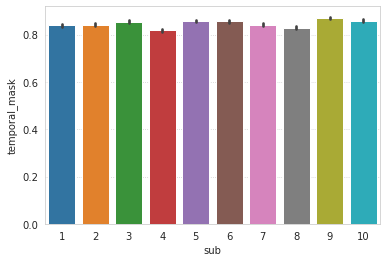

In [4]:
sns.barplot(data=tm_df, x='sub', y='temporal_mask')
plt.show()

In [5]:
df = tm_df.groupby(['key']).mean()
df

,sub,ses,run,temporal_mask
key,,,,
sub-SLC01_ses-1_run-1,1.0,1.0,1.0,0.936667
sub-SLC01_ses-1_run-2,1.0,1.0,2.0,0.643333
sub-SLC01_ses-1_run-3,1.0,1.0,3.0,0.858333
sub-SLC01_ses-1_run-4,1.0,1.0,4.0,0.503333
sub-SLC01_ses-1_run-5,1.0,1.0,5.0,0.790000
...,...,...,...,...
sub-SLC10_ses-3_run-3,10.0,3.0,3.0,0.941667
sub-SLC10_ses-3_run-4,10.0,3.0,4.0,0.861667
sub-SLC10_ses-3_run-5,10.0,3.0,5.0,0.876667


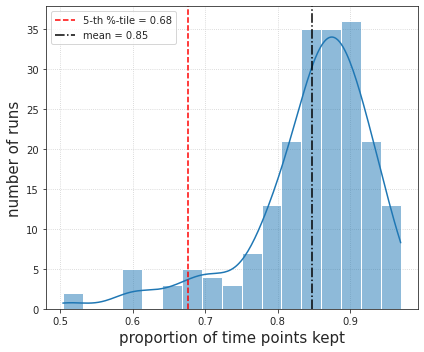

In [6]:
fig, ax = create_figure(1, 1, (6, 5))

sns.histplot(df, x='temporal_mask', kde=True, ax=ax)
q = df['temporal_mask'].quantile(q=0.05)
ax.axvline(q, color='r', ls='--', label=f'5-th %-tile = {q:0.2f}')
q = df['temporal_mask'].mean()
ax.axvline(q, color='k', ls='-.', label=f'mean = {q:0.2f}')
ax.set_xlabel('proportion of time points kept', fontsize=15)
ax.set_ylabel('number of runs', fontsize=15)
ax.grid()
ax.legend()

plt.show()

In [7]:
q = df['temporal_mask'].quantile(q=0.05)
q

0.6768333333333333

In [8]:
df.loc[df['temporal_mask'] <= q]

,sub,ses,run,temporal_mask
key,,,,
sub-SLC01_ses-1_run-2,1.0,1.0,2.0,0.643333
sub-SLC01_ses-1_run-4,1.0,1.0,4.0,0.503333
sub-SLC02_ses-2_run-5,2.0,2.0,5.0,0.608333
sub-SLC02_ses-3_run-5,2.0,3.0,5.0,0.590000
sub-SLC03_ses-1_run-3,3.0,1.0,3.0,0.603333
sub-SLC04_ses-1_run-4,4.0,1.0,4.0,0.661667
sub-SLC05_ses-2_run-2,5.0,2.0,2.0,0.643333
sub-SLC07_ses-1_run-5,7.0,1.0,5.0,0.676667
sub-SLC07_ses-1_run-7,7.0,1.0,7.0,0.590000


In [9]:
df.loc[df['temporal_mask'] > 0.95]

,sub,ses,run,temporal_mask
key,,,,
sub-SLC01_ses-2_run-7,1.0,2.0,7.0,0.958333
sub-SLC03_ses-3_run-1,3.0,3.0,1.0,0.970000
sub-SLC06_ses-2_run-7,6.0,2.0,7.0,0.958333
sub-SLC07_ses-3_run-5,7.0,3.0,5.0,0.966667
sub-SLC08_ses-1_run-3,8.0,1.0,3.0,0.960000
sub-SLC09_ses-1_run-7,9.0,1.0,7.0,0.963333
sub-SLC10_ses-2_run-1,10.0,2.0,1.0,0.960000


## Brain mask

In [10]:
mask_files = []
for p in pathlib.Path(cwd).rglob('*_brain_mask.nii.gz'):
    mask_files.append(str(p))
mask_files = sorted(mask_files)

In [11]:
masks = {}
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        for run in mice.cfg.run_ids:
            patterns = [
                f"sub-SLC{sub:02d}",
                f"ses-{ses:d}",
                f"run-{run:d}",
            ]
            key = '_'.join(patterns)
            try:
                f = next(
                    e for e in mask_files if
                    all(k in e for k in patterns)
                )
                masks[key] = ants.image_read(f)
            except StopIteration:
                print(f"Warning, missing:\t{key}")

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC08_ses-1_run-7

In [12]:
good_ctr = 0
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        key = f"sub-SLC{sub:02d}_ses-{ses:d}"
        available = {k: v for k, v in masks.items() if key in k}
        for i, j in itertools.combinations(range(len(available)), 2):
            m1 = list(available.values())[i].numpy()
            m2 = list(available.values())[j].numpy()
            if overlap_score(m1, m2) != 1.0 or dice_score(m1, m2) != 1.0:
                print(i, j, overlap_score(m1, m2), dice_score(m1, m2))
            else:
                good_ctr += 1
good_ctr

606

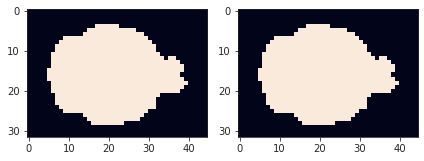

In [13]:
i = 1
j = 3
m1 = masks[f'sub-SLC04_ses-2_run-{i}'].numpy()
m2 = masks[f'sub-SLC04_ses-2_run-{j}'].numpy()
fig, axes = create_figure(1, 2)
axes[0].imshow(m1[..., 15])
axes[1].imshow(m2[..., 15])
plt.show()

In [14]:
masks_ses = {}
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        _masks = []
        for run in mice.cfg.run_ids:
            key = mice.get_key(sub, ses, run)
            m = masks.get(key)
            if m is not None:
                _masks.append(m.numpy())
                
        key = mice.get_key(sub, ses)
        if len(_masks):
            m = functools.reduce(np.logical_and, _masks)
            masks_ses[key] = m.astype(bool)
        else:
            print(f"Warning, missing:\t{key}")

In [15]:
masks_ses['sub-SLC02_ses-1'].shape

(32, 43, 26)

In [16]:
sub, ses

(10, 3)

<matplotlib.image.AxesImage object at 0x7f0d6b92afd0>

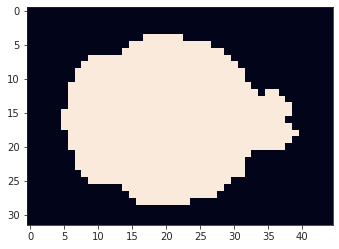

In [17]:
plt.imshow(masks_ses['sub-SLC04_ses-2'][..., 15])

In [18]:
m200 = mice.mask3d['sub-SLC04_ses-2'].load_ants()
m200

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 64, 78)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [19]:
m400 = masks['sub-SLC04_ses-2_run-1']
m400

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (32, 45, 26)
         Spacing    : (0.4, 0.4, 0.4)
         Origin     : (19.0, 7.9, -4.65)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

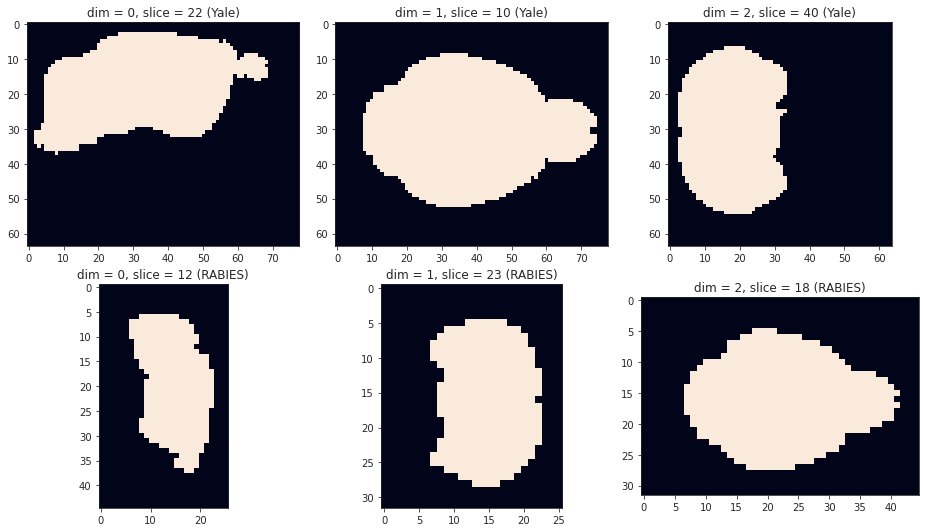

In [21]:
slices = [(22, 12), (10, 23), (40, 18)]

fig, axes = create_figure(2, 3, (13, 7.5))
for dim, (slice_yale, slice_gabe) in enumerate(slices):
    axes[0, dim].imshow(np.take(m200.numpy(), slice_yale, dim))
    axes[1, dim].imshow(np.take(m400.numpy(), slice_gabe, dim))

    axes[0, dim].set_title(f'dim = {dim}, slice = {slice_yale} (Yale)')
    axes[1, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (RABIES)')
plt.show()

In [34]:
m400_reor = np.transpose(m400.numpy(), (0, 2, 1))
m400_reor = m400_reor[::-1][:, ::-1, :]

In [35]:
m200.shape, m400_reor.shape

((64, 64, 78), (32, 26, 45))

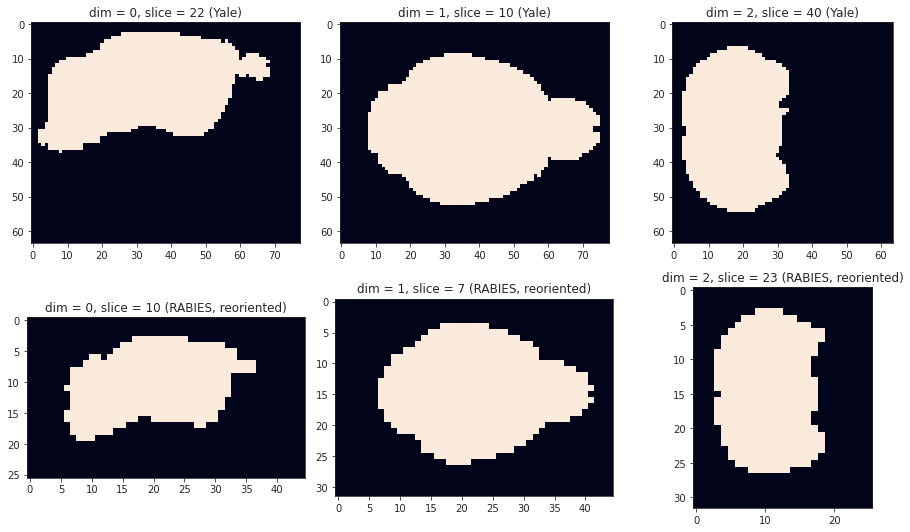

In [37]:
slices = [(22, 10), (10, 7), (40, 23)]

fig, axes = create_figure(2, 3, (13, 7.5))
for dim, (slice_yale, slice_gabe) in enumerate(slices):
    axes[0, dim].imshow(np.take(m200.numpy(), slice_yale, dim))
    axes[1, dim].imshow(np.take(m400_reor, slice_gabe, dim))

    axes[0, dim].set_title(f'dim = {dim}, slice = {slice_yale} (Yale)')
    axes[1, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (RABIES, reoriented)')
plt.show()

In [260]:
m200_resample = ants.resample_image(m200, (0.4,)*3)

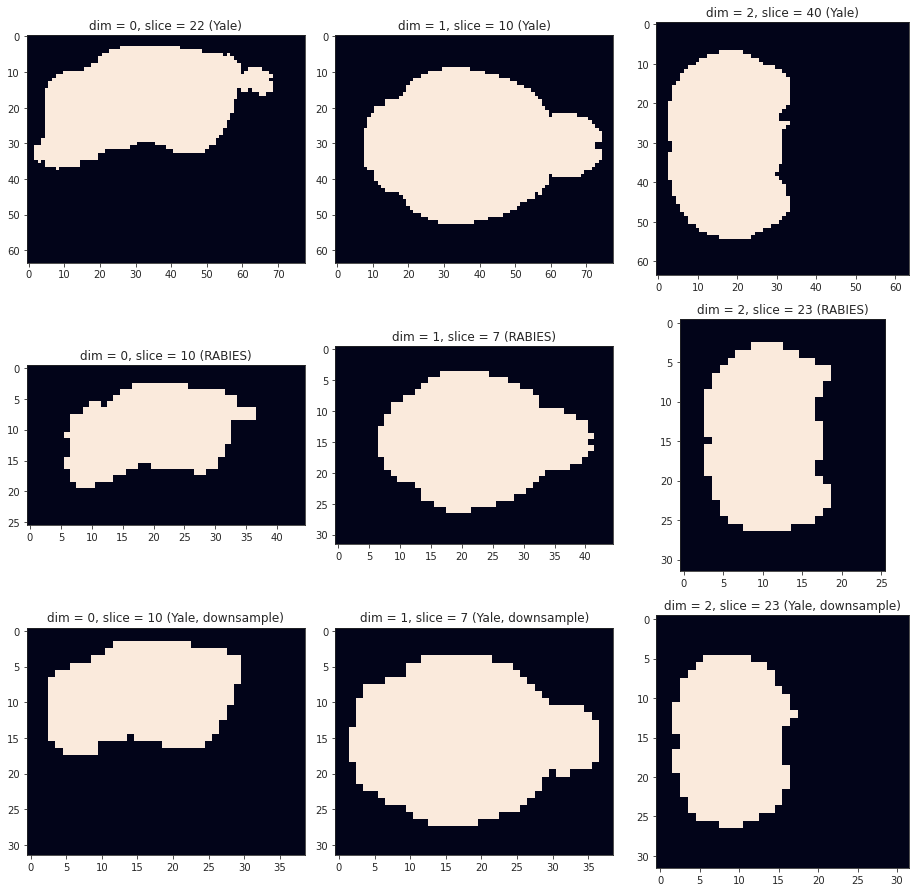

In [262]:
slices = [(22, 10), (10, 7), (40, 23)]

fig, axes = create_figure(3, 3, (13, 12.5))
for dim, (slice_yale, slice_gabe) in enumerate(slices):
    axes[0, dim].imshow(np.take(m200.numpy(), slice_yale, dim))
    axes[1, dim].imshow(np.take(m400_reor, slice_gabe, dim))
    axes[2, dim].imshow(np.take(m200_resample.numpy(), slice_gabe, dim))

    axes[0, dim].set_title(f'dim = {dim}, slice = {slice_yale} (Yale)')
    axes[1, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (RABIES)')
    axes[2, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (Yale, downsample)')
    
plt.show()

In [40]:
_dir = '/home/hadi/Downloads'
m200_rabies = ants.image_read(pjoin(_dir, 'sub-SLC04_ses-2_task-led_run-2_bold_EPI_brain_mask.nii.gz'))
m200_rabies

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 90, 53)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (19.0, 7.9, -4.65)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [41]:
m200_rabies = m200_rabies.numpy()

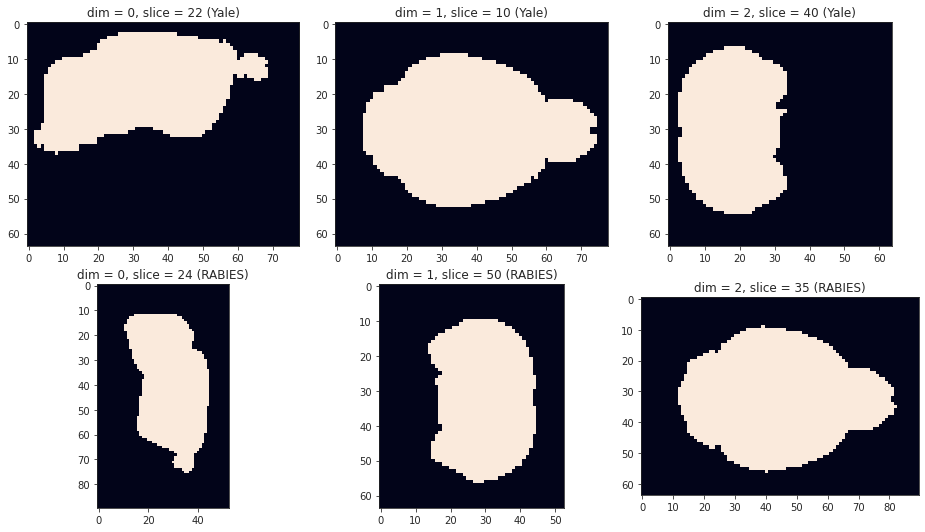

In [75]:
slices = [(22, 24), (10, 50), (40, 35)]

fig, axes = create_figure(2, 3, (13, 7.5))
for dim, (slice_yale, slice_gabe) in enumerate(slices):
    axes[0, dim].imshow(np.take(m200.numpy(), slice_yale, dim))
    axes[1, dim].imshow(np.take(m200_rabies, slice_gabe, dim))

    axes[0, dim].set_title(f'dim = {dim}, slice = {slice_yale} (Yale)')
    axes[1, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (RABIES)')
plt.show()

In [76]:
m200_reor = np.transpose(m200_rabies, (0, 2, 1))
m200_reor = m200_reor[::-1][:, ::-1, :]

In [82]:
m200_rabies.shape, m200_reor.shape

((64, 90, 53), (64, 53, 90))

In [85]:
64 - 24

40

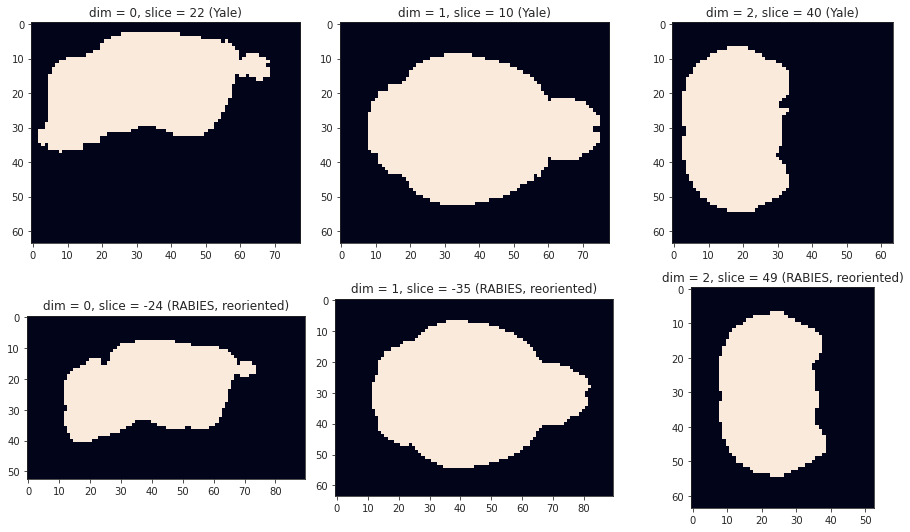

In [98]:
slices = [(22, 24), (10, 50), (40, 35)]
slices = [(22, -24), (10, -35), (40, 49)]

fig, axes = create_figure(2, 3, (13, 7.5))
for dim, (slice_yale, slice_gabe) in enumerate(slices):
    axes[0, dim].imshow(np.take(m200.numpy(), slice_yale, dim))
    axes[1, dim].imshow(np.take(m200_reor, slice_gabe, dim))

    axes[0, dim].set_title(f'dim = {dim}, slice = {slice_yale} (Yale)')
    axes[1, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (RABIES, reoriented)')
plt.show()

## Start
---
---

In [102]:
from register.register import reset_ants_img

In [99]:
_dir = '/home/hadi/Downloads'
file = 'sub-SLC04_ses-2_task-led_run-2_bold_EPI_brain_mask.nii.gz'
file = pjoin(_dir, file)
m200_rabies = ants.image_read(file)
m200_rabies

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 90, 53)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (19.0, 7.9, -4.65)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [100]:
m200_reor = np.transpose(m200_rabies.numpy(), (0, 2, 1))
m200_reor = m200_reor[::-1][:, ::-1, :]

In [106]:
m200_reor = reset_ants_img(
    img=m200_reor,
    spacing=m200_rabies.spacing,
    use_um=False,
)
m200_reor

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 53, 90)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [115]:
tr = ants.registration(
    fixed=m200_reor,
    moving=m200,
    type_of_transform='Translation',
)
warped = ants.apply_transforms(
    fixed=m200_reor,
    moving=m200,
    transformlist=tr['fwdtransforms'],
)
warped

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 53, 90)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

<matplotlib.image.AxesImage object at 0x7f0d6adc1a90>

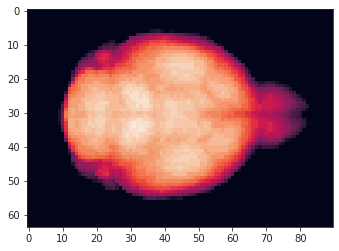

In [123]:
plt.imshow(m200_reor.mean(1))

<matplotlib.image.AxesImage object at 0x7f0d6b3985b0>

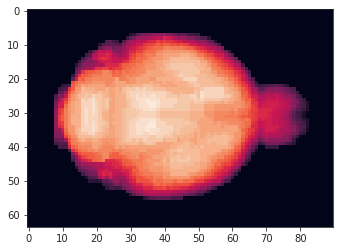

In [124]:
plt.imshow(warped.mean(1))

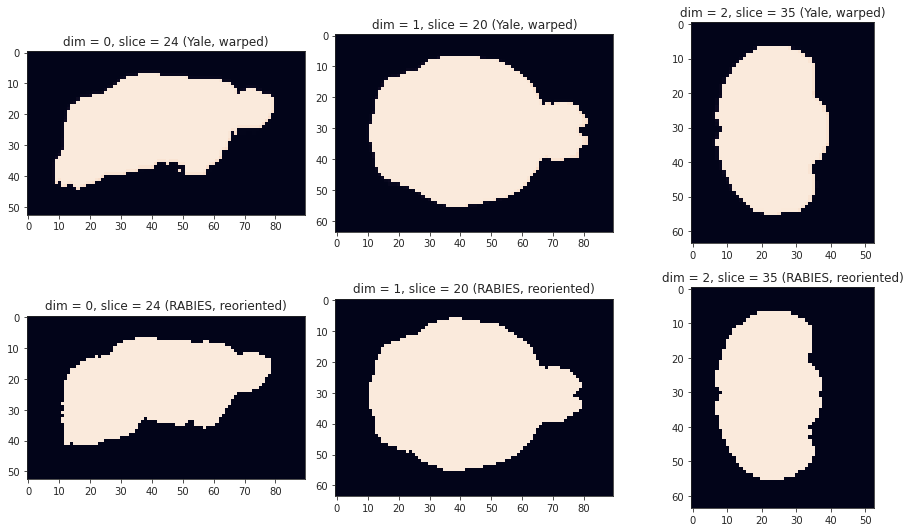

In [126]:
slices = [(24, 24), (20, 20), (35, 35)]

fig, axes = create_figure(2, 3, (13, 7.5))
for dim, (slice_yale, slice_gabe) in enumerate(slices):
    axes[0, dim].imshow(np.take(warped.numpy(), slice_yale, dim))
    axes[1, dim].imshow(np.take(m200_reor.numpy(), slice_gabe, dim))

    axes[0, dim].set_title(f'dim = {dim}, slice = {slice_yale} (Yale, warped)')
    axes[1, dim].set_title(f'dim = {dim}, slice = {slice_gabe} (RABIES, reoriented)')
plt.show()

## End
---
---

In [220]:
hres = ants.image_read(pjoin(tmp_dir, 'sub-SLC04_ses-2_acq-highresinplane_T1w.nii.gz'))
iso = mice.T1w['sub-SLC04_ses-2'].load_ants()
iso

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 64, 78)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [221]:
hres

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (256, 128, 28)
         Spacing    : (0.1, 0.1, 0.4)
         Origin     : (12.8, -6.3, -5.6)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [147]:
hres.shape, iso.shape

((256, 128, 28), (64, 64, 78))

<matplotlib.image.AxesImage object at 0x7f4d633e7040>

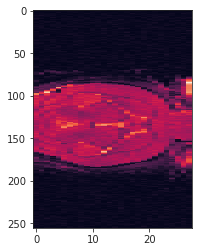

In [163]:
plt.imshow(hres[:, 37, :], aspect=0.15)

<matplotlib.image.AxesImage object at 0x7f4d4e122970>

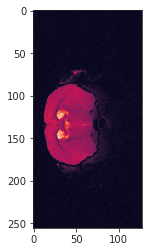

In [194]:
plt.imshow(hres[..., 16], aspect=1)

In [196]:
x = ants.image_read(pjoin(tmp_dir, 'sub-SLC04_ses-2_task-rest_run-1_bold.nii.gz'))
x

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 32, 28, 600)
         Spacing    : (0.4, 0.4, 0.4, 1.0)
         Origin     : (12.8, -6.0, -5.6, 0.0)
         Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

<matplotlib.colorbar.Colorbar object at 0x7f4d4d0447c0>

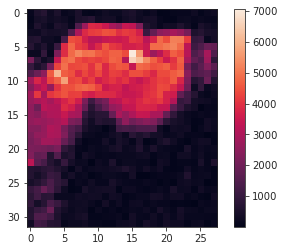

In [210]:
plt.imshow(x[30, ..., 150])
plt.colorbar()

<matplotlib.colorbar.Colorbar object at 0x7f4d4cc5c9a0>

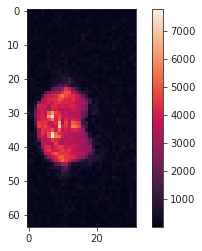

In [219]:
plt.imshow(x[:, :, 16, 120])
plt.colorbar()

In [224]:
bold_files = []
for p in pathlib.Path(cwd).rglob('*_bold_combined_cleaned.nii.gz'):
    bold_files.append(str(p))
bold_files = sorted(bold_files)

In [225]:
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        for run in mice.cfg.run_ids:
            patterns = [
                f"sub-SLC{sub:02d}",
                f"ses-{ses:d}",
                f"run-{run:d}",
            ]
            key = '_'.join(patterns)
            try:
                f = next(
                    e for e in bold_files if
                    all(k in e for k in patterns)
                )
            except StopIteration:
                print(f"Warning, missing:\t{key}")

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC03_ses-3_run-2

Warning, missing:       sub-SLC04_ses-3_run-2

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC07_ses-1_run-6

Warning, missing:       sub-SLC08_ses-1_run-7

In [228]:
img = ants.image_read(f)
img

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (32, 45, 26, 503)
         Spacing    : (0.4, 0.4, 0.4, 1.0)
         Origin     : (19.3, 7.75, -4.95, 0.0)
         Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

<matplotlib.image.AxesImage object at 0x7f4d47daf370>

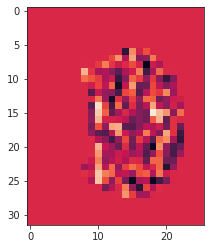

In [243]:
plt.imshow(img.numpy()[:, 26, :, 160])

In [230]:
m400.shape, m400_reor.shape

((32, 45, 26), (32, 26, 45))

## Downsample ROIs

In [244]:
obj_files = sorted([
    str(e) for e in
    pathlib.Path(mice.cfg.masks_dir).rglob('*_cortex.nii.gz*')
])

t1ws = {}
objs = {}
for key, anat in mice.T1w.items():
    file = next(
        f for f in obj_files
        if key in f
    )
    objs[key] = ants.image_read(
        pjoin(mice.cfg.masks_dir, file),
        pixeltype='unsigned int',
    )
    t1ws[key] = anat.load_ants().numpy()

In [246]:
key = mice.get_key(4, 2)
key

'sub-SLC04_ses-2'

<matplotlib.image.AxesImage object at 0x7f4d47cd9af0>

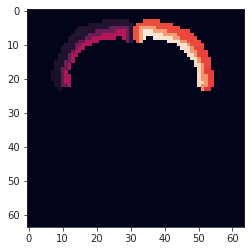

In [248]:
plt.imshow(objs[key][..., 40].T)